Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points <br>
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points <br>
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points <br>
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points <br>
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points <br>
Question 6 - GameStop Stock and Revenue Dashboard- 2 Points <br>
Question 7 - Sharing your Assignment Notebook - 2 Points

In [3]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install matplotlib
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 103.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 96.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 102.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 11.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=a4e55d469819eadeee0ead46bd180d4beec

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib_inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [220]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [241]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [242]:
# Get the data from the url and make it into a beautiful soup object.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

# Create dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Go through the list of tables and select the table which contains the words "Tesla Quarterly Revenue".
for table in soup.find_all('table'):
    if table.find(string="Tesla Quarterly Revenue"):
        correct_table = table

# Go through all the table rows and add table data to my dataframe.
for row in correct_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

#Tidy up the revenue data.
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [243]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [240]:
# Get the data from the url and make it into a beautiful soup object.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

# Create dataframe
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Go through the list of tables and select the table which contains the words "Tesla Quarterly Revenue".
for table in soup.find_all('table'):
    if table.find(string="GameStop Quarterly Revenue"):
        correct_table = table

# Go through all the table rows and add table data to my dataframe.
for row in correct_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gamestop_revenue = pd.concat([gamestop_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

#Tidy up the revenue data.
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gamestop_revenue.dropna(inplace=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gamestop_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


#### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

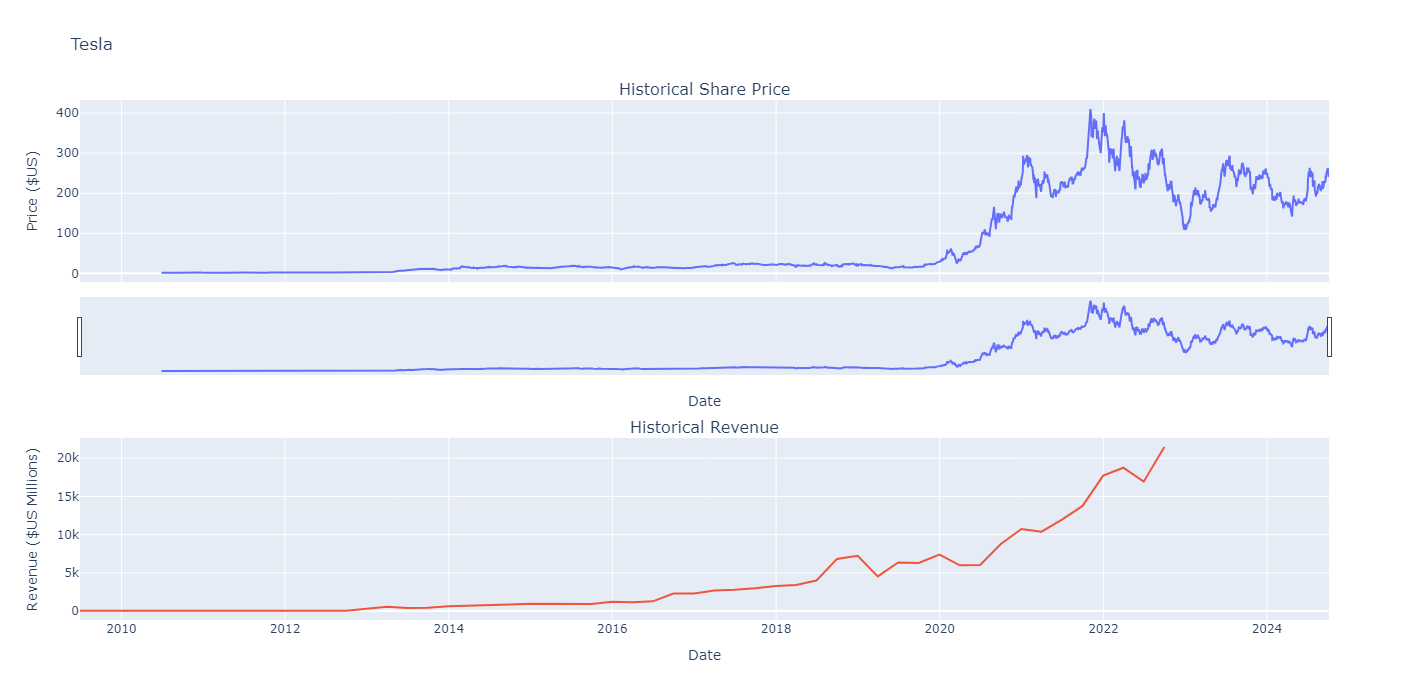

In [233]:
# Set up up the function to make the graphs
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024-10-04']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-10-04']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=700,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Create the graph to display the data
make_graph(tesla_data, tesla_revenue, 'Tesla')

#### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

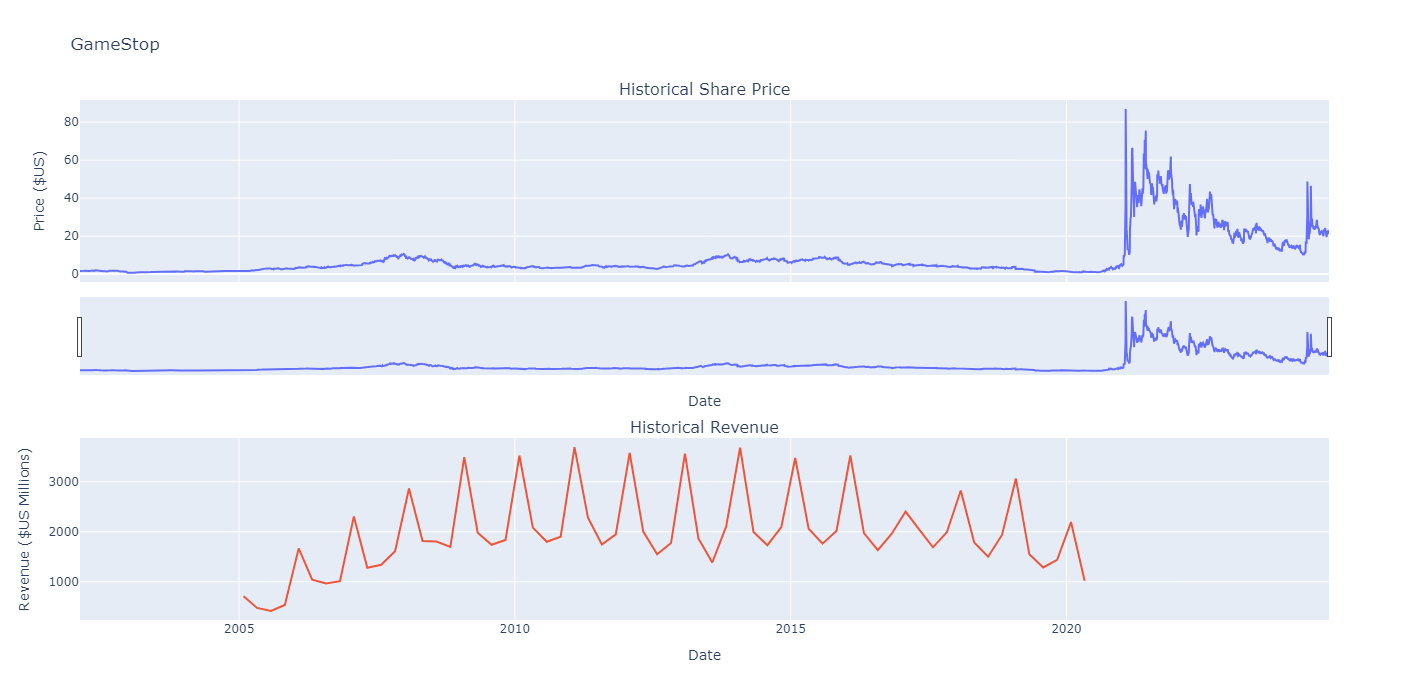

In [234]:
# Create the graph to display the data
make_graph(gamestop_data, gamestop_revenue, 'GameStop')